In [8]:
# Author: Krittaprot Tangkittikun
# Linkedin: https://www.linkedin.com/in/krittaprot-tangkittikun-0103a9109/
# Medium: https://medium.com/@odeforodds
# Website: https://krittaprot.github.io/
# Date Posted: June 3, 2024

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
import sys
import os

/kaggle/input/churn-modelling/Churn_Modelling.csv


## Loading and Inspecting the Dataset

In [9]:
filepath = "Churn_Modelling.csv"

df = pd.read_csv(filepath)
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df = df.drop(columns=['CustomerId','RowNumber', 'Surname'])

In [12]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [14]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Data Preprocessing

In [15]:
# Prepare the data
X = df.drop(columns=['Exited'])
y = df['Exited']

# Split the data into training (60%) and temporary (40%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42, stratify=y
)

# Split the temporary set into validation (20%) and test (20%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Print the shape of the splits to verify
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6000, 10)
X_val shape: (2000, 10)
X_test shape: (2000, 10)
y_train shape: (6000,)
y_val shape: (2000,)
y_test shape: (2000,)


In [16]:
# Identify categorical features
categorical_features = ['Geography', 'Gender']

# Create CatBoost Pool objects for CatBoost
train_pool = Pool(data=X_train, label=y_train, cat_features=categorical_features)
val_pool = Pool(data=X_val, label=y_val, cat_features=categorical_features)
test_pool = Pool(data=X_test, label=y_test, cat_features=categorical_features)

## Feature Selection & Model Training

In [74]:
# Initialize and train the CatBoost model
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.2,
    depth=9,
    loss_function='Logloss',
    eval_metric='Logloss',
    random_seed=42,
    verbose=50
)

# Select features
select_features = model.select_features(
    train_pool,
    eval_set=val_pool,
    features_for_select="0-9",
    num_features_to_select=6,  # You can set this to the number of features you want to select
    algorithm='RecursiveByShapValues',  # You can choose other algorithms as well
    steps=5,  # Number of steps to take in feature selection
    shap_calc_type='Exact',  # SHAP calculation type, can be 'Approximate' for faster results
    train_final_model=True,
    verbose=50,
    plot=True,
    log_cout=sys.stdout,
    log_cerr=sys.stderr
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

The number of features selection steps (5) is greater than the number of features to eliminate (4). The number of steps was reduced to 4.
Step #1 out of 4
0:	learn: 0.6107859	test: 0.6131000	best: 0.6131000 (0)	total: 9.59ms	remaining: 950ms
50:	learn: 0.2819752	test: 0.3232323	best: 0.3226457 (45)	total: 367ms	remaining: 352ms
99:	learn: 0.2444000	test: 0.3260208	best: 0.3226457 (45)	total: 698ms	remaining: 0us

bestTest = 0.3226456731
bestIteration = 45

Shrink model to first 46 iterations.
Feature #0 eliminated
Step #2 out of 4
0:	learn: 0.6002281	test: 0.5987337	best: 0.5987337 (0)	total: 2.93ms	remaining: 290ms
50:	learn: 0.2879904	test: 0.3212924	best: 0.3212788 (49)	total: 334ms	remaining: 320ms
99:	learn: 0.2525300	test: 0.3252095	best: 0.3211430 (51)	total: 683ms	remaining: 0us

bestTest = 0.3211430078
bestIteration = 51

Shrink model to first 52 iterations.
Feature #9 eliminated
Step #3 out of 4
0:	learn: 0.6053503	test: 0.6061190	best: 0.6061190 (0)	total: 11ms	remaining: 1.

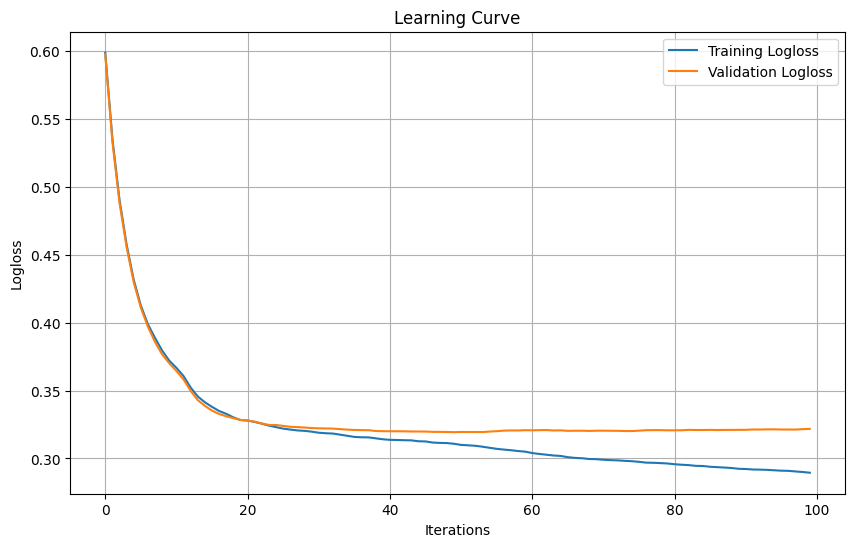

In [75]:
import matplotlib.pyplot as plt

# Extract learning curve data
evals_result = model.evals_result_

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(evals_result['learn']['Logloss'], label='Training Logloss')
plt.plot(evals_result['validation']['Logloss'], label='Validation Logloss')
plt.xlabel('Iterations')
plt.ylabel('Logloss')
plt.title('Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

## Model Evaluation & Optimization

In [84]:
#the default probability threshold is 0.5, we can change this as desired
model.set_probability_threshold(0.3)
model.get_probability_threshold()

0.3

In [85]:
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicting the labels
y_pred_train = model.predict(train_pool)
y_pred_val = model.predict(val_pool)
y_pred_test = model.predict(test_pool)

# Predicting the probabilities for ROC AUC
y_pred_train_proba = model.predict_proba(train_pool)[:, 1]
y_pred_val_proba = model.predict_proba(val_pool)[:, 1]
y_pred_test_proba = model.predict_proba(test_pool)[:, 1]

print(pd.Series(y_pred_train).value_counts())
print(pd.Series(y_pred_val).value_counts())
print(pd.Series(y_pred_test).value_counts())

0    4713
1    1287
Name: count, dtype: int64
0    1546
1     454
Name: count, dtype: int64
0    1566
1     434
Name: count, dtype: int64


In [86]:
# Evaluate ROC AUC Score
roc_auc_train = round(roc_auc_score(y_train, y_pred_train_proba), 2)
roc_auc_val = round(roc_auc_score(y_val, y_pred_val_proba), 2)
roc_auc_test = round(roc_auc_score(y_test, y_pred_test_proba), 2)

# Confusion Matrix
conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_val = confusion_matrix(y_val, y_pred_val)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Precision, Recall, F1 Score
precision_train = round(precision_score(y_train, y_pred_train), 2)
recall_train = round(recall_score(y_train, y_pred_train), 2)
f1_train = round(f1_score(y_train, y_pred_train), 2)

precision_val = round(precision_score(y_val, y_pred_val), 2)
recall_val = round(recall_score(y_val, y_pred_val), 2)
f1_val = round(f1_score(y_val, y_pred_val), 2)

precision_test = round(precision_score(y_test, y_pred_test), 2)
recall_test = round(recall_score(y_test, y_pred_test), 2)
f1_test = round(f1_score(y_test, y_pred_test), 2)

# Creating DataFrame for the metrics
data = {
    'Metric': ['ROC AUC Score', 'Precision', 'Recall', 'F1 Score'],
    'Train': [roc_auc_train, precision_train, recall_train, f1_train],
    'Validation': [roc_auc_val, precision_val, recall_val, f1_val],
    'Test': [roc_auc_test, precision_test, recall_test, f1_test]
}

df_metrics = pd.DataFrame(data)

df_metrics

,Metric,Train,Validation,Test
0,ROC AUC Score,0.88,0.88,0.87
1,Precision,0.63,0.62,0.61
2,Recall,0.67,0.69,0.65
3,F1 Score,0.65,0.66,0.63


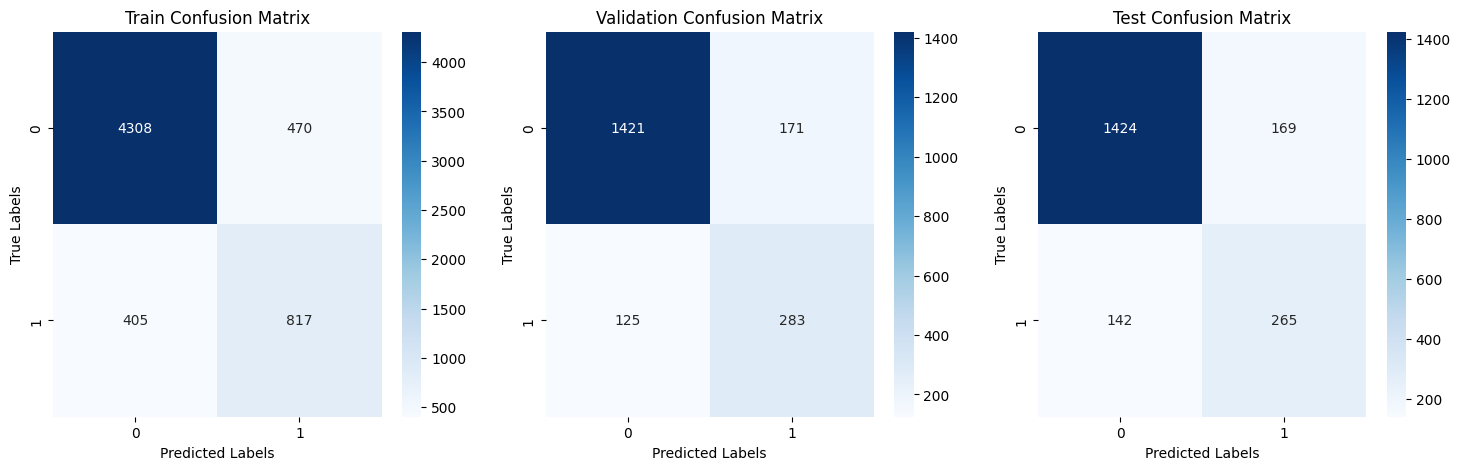

In [87]:
# Plotting Confusion Matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', ax=ax[0], cmap='Blues')
ax[0].set_title('Train Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_val, annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title('Validation Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

sns.heatmap(conf_matrix_test, annot=True, fmt='d', ax=ax[2], cmap='Blues')
ax[2].set_title('Test Confusion Matrix')
ax[2].set_xlabel('Predicted Labels')
ax[2].set_ylabel('True Labels')

plt.show()

## Feature Importances

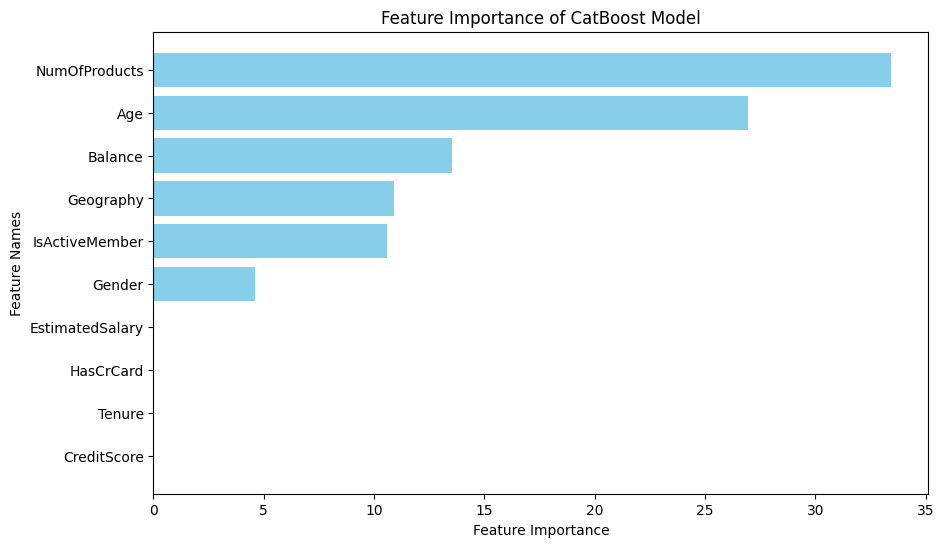

In [61]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importances = model.get_feature_importance()
feature_names = model.feature_names_

# Sort the feature importances and names
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance of CatBoost Model')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()

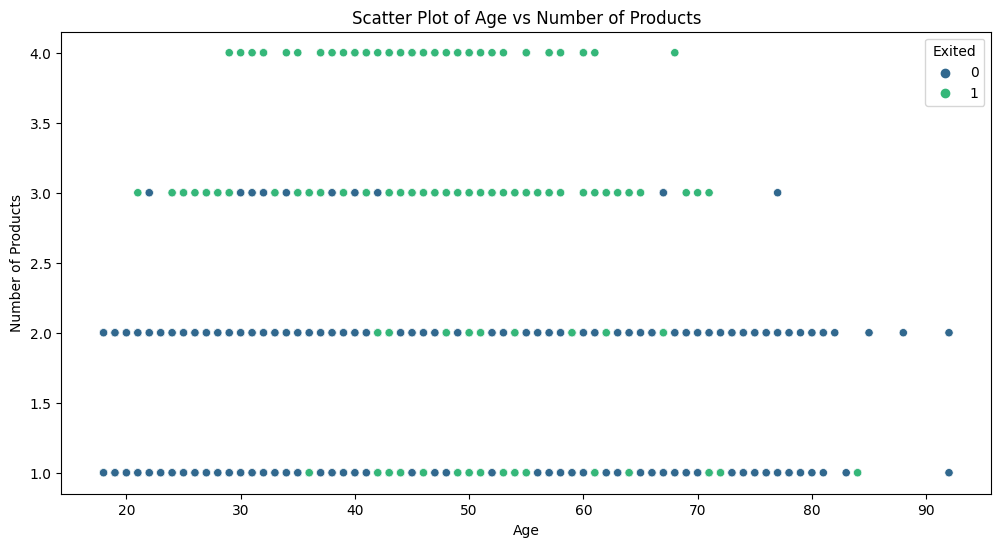

In [88]:
# Scatter plot for Age and Number of Products
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Age', y='NumOfProducts', hue='Exited', palette='viridis')
plt.title('Scatter Plot of Age vs Number of Products')
plt.xlabel('Age')
plt.ylabel('Number of Products')
plt.legend(title='Exited')
plt.show()

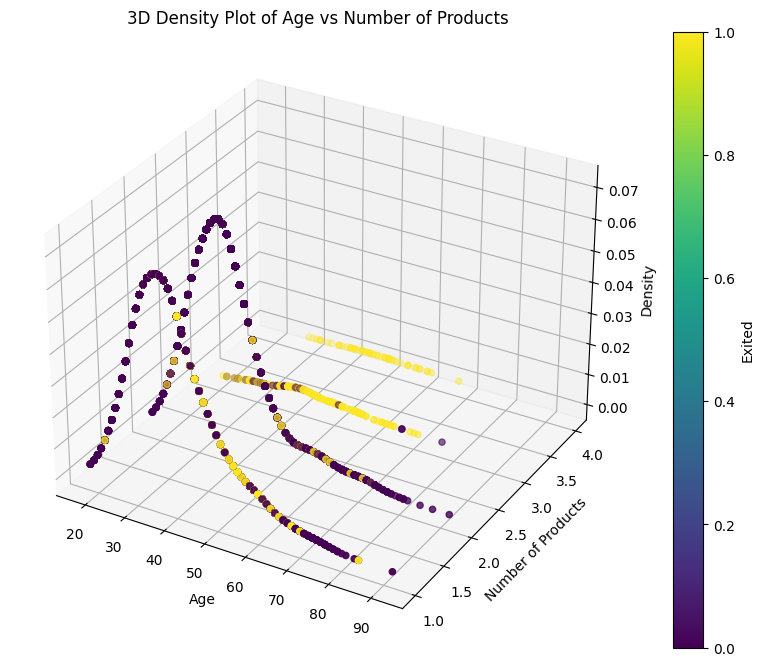

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import gaussian_kde

# Assuming df is your DataFrame and it has 'Age', 'NumOfProducts', and 'Exited' columns
# df = pd.read_csv('/path/to/your/data.csv')

# Create grid to evaluate kde
x = df['Age']
y = df['NumOfProducts']
z = df['Exited']

# Create a 2D array of x and y
xy = np.vstack([x, y])

# Perform kernel density estimate
kde = gaussian_kde(xy)
z_density = kde(xy)

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
sc = ax.scatter(x, y, z_density, c=z, cmap='viridis')

# Add color bar which maps values to colors
cbar = plt.colorbar(sc)
cbar.set_label('Exited')

# Set labels
ax.set_xlabel('Age')
ax.set_ylabel('Number of Products')
ax.set_zlabel('Density')

# Title
ax.set_title('3D Density Plot of Age vs Number of Products')

plt.show()


In [90]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import gaussian_kde

# Create grid to evaluate kde
x = df['Age']
y = df['NumOfProducts']
z = df['Exited']

# Create a 2D array of x and y
xy = np.vstack([x, y])

# Perform kernel density estimate
kde = gaussian_kde(xy)
z_density = kde(xy)

# Create the interactive 3D scatter plot using Plotly
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z_density,
    mode='markers',
    marker=dict(
        size=5,
        color=z,  # Color by 'Exited'
        colorscale='Viridis',  # Choose a colorscale
        opacity=0.8
    )
)])

# Update the layout
fig.update_layout(
    title='3D Density Plot of Age vs Number of Products',
    scene=dict(
        xaxis_title='Age',
        yaxis_title='Number of Products',
        zaxis_title='Density'
    ),
    coloraxis_colorbar=dict(
        title='Exited'
    )
)

# Show the plot
fig.show()


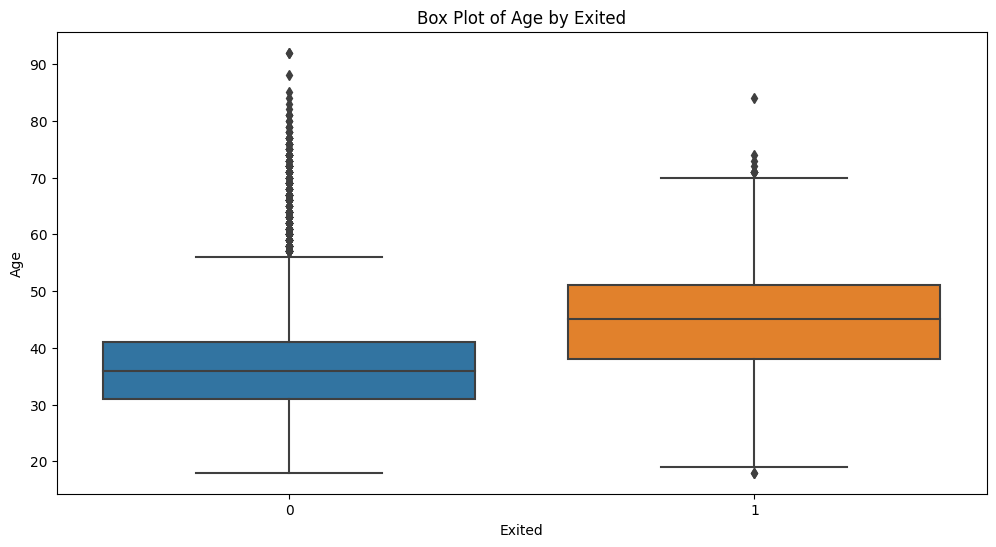

In [95]:
# Box plot for Age
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Box Plot of Age by Exited')
plt.xlabel('Exited')
plt.ylabel('Age')
plt.show()

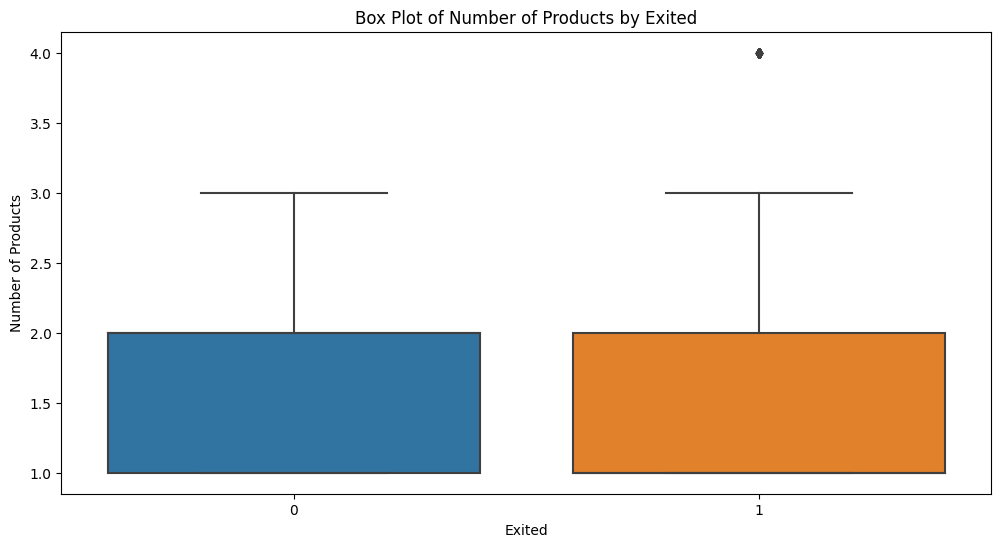

In [92]:
# Box plot for Number of Products
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Exited', y='NumOfProducts')
plt.title('Box Plot of Number of Products by Exited')
plt.xlabel('Exited')
plt.ylabel('Number of Products')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



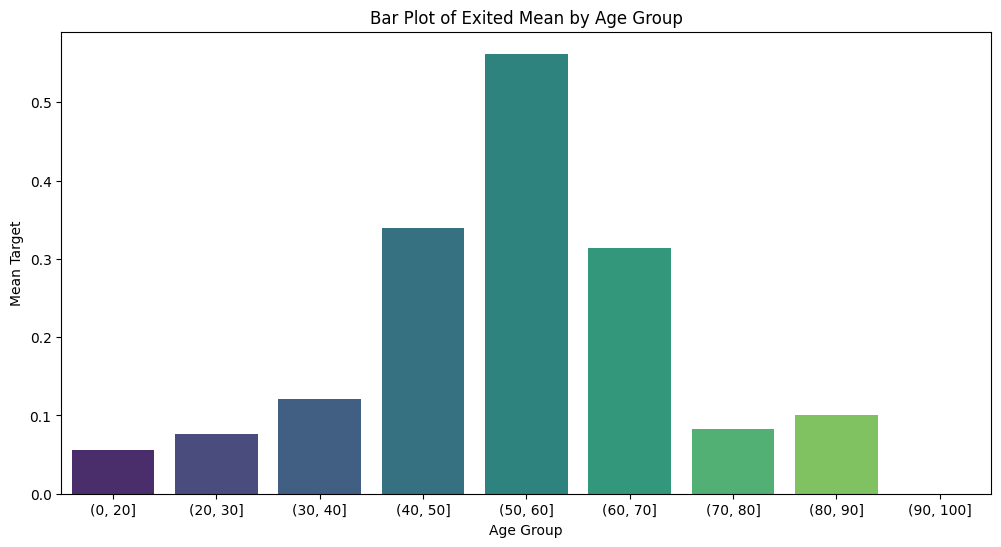

In [93]:
# Bar plot for Age
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100])
age_group_means = df.groupby('AgeGroup', observed=True)['Exited'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_means, x='AgeGroup', y='Exited', palette='viridis')
plt.title('Bar Plot of Exited Mean by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Mean Target')
plt.show()

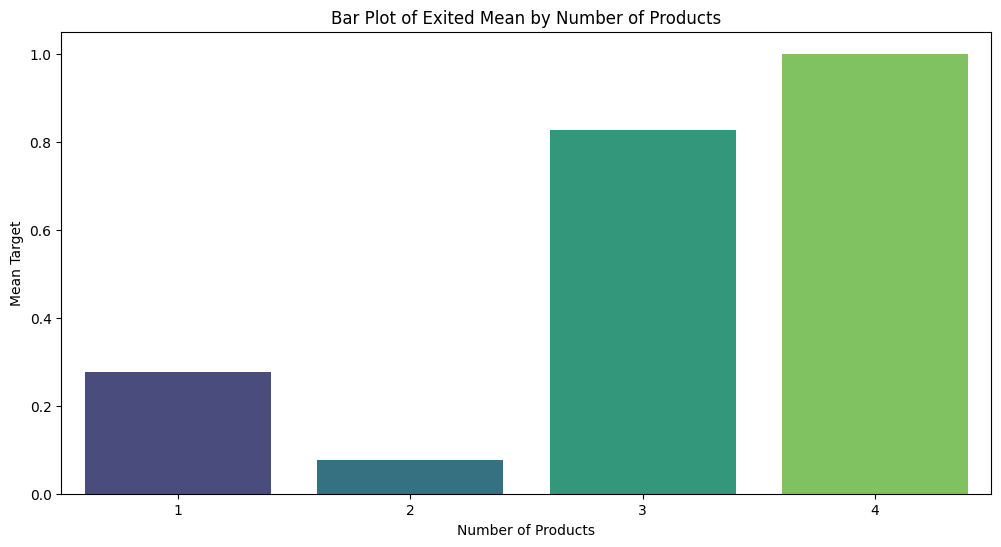

In [94]:
# Bar plot for Number of Products
num_products_means = df.groupby('NumOfProducts')['Exited'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=num_products_means, x='NumOfProducts', y='Exited', palette='viridis')
plt.title('Bar Plot of Exited Mean by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Mean Target')
plt.show()

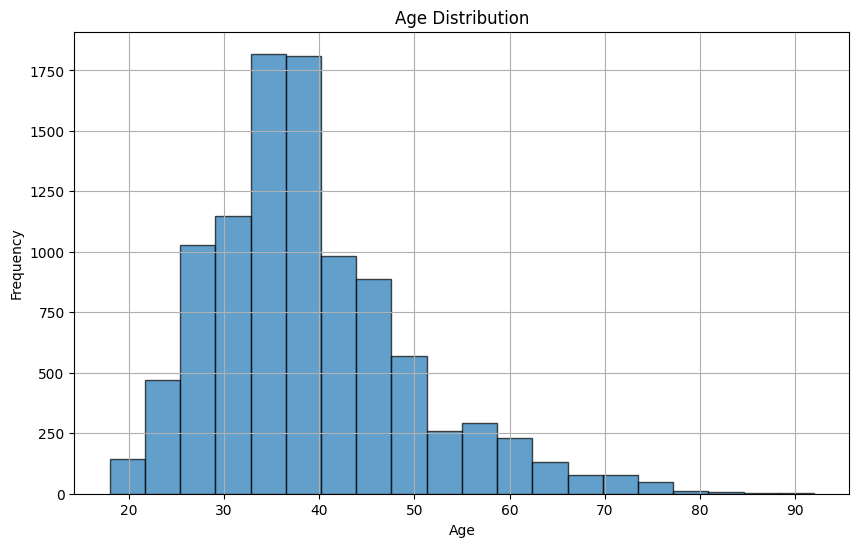

In [97]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Reference: 
* https://catboost.ai/en/docs/
* https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_set_probability_threshold
* https://catboost.ai/en/docs/concepts/python-reference_catboost_predict
* https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier_predict_proba